# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [66]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [67]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/rtaylor/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


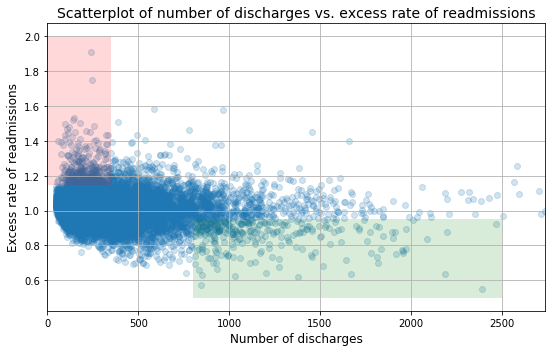

In [289]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A.  Do I agree with the analysis?
*Approach:*
1. Fit a line to the data to confirm the claim of a decreasing relationshsip between readmission rate and number of discharges.
2. It appears that there are several different admission types in the dataset - determine whether these excess cases corresponded to a certain type of hospital case.
3. Check the results presented in the preliminary report


The Pearson correlation coefficient for discharges vs excess readmisison rate is: -0.09


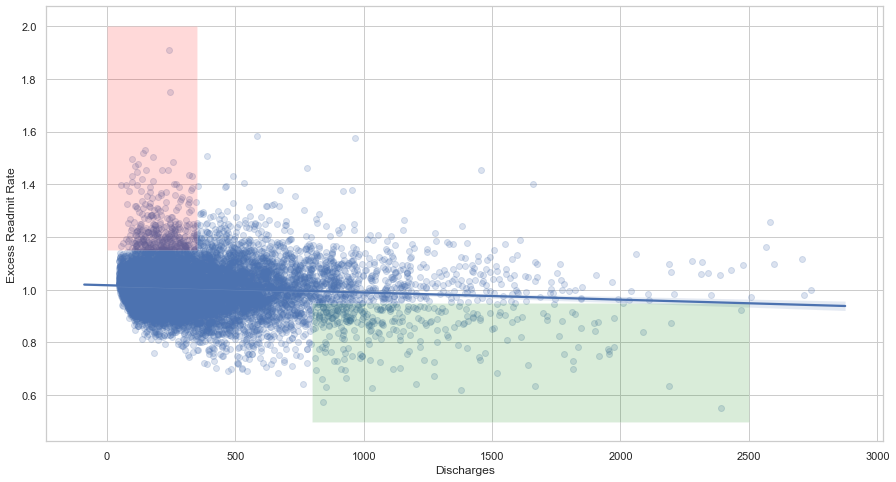

In [333]:
#Observation A:  do we actually see evidence of declining excess readmission rate with increase in number of discharges?
import seaborn as sns
sns.set_style('whitegrid')
fig,ax = plt.subplots(figsize=[15,8])
sns.regplot(x,y,ax=ax,scatter_kws={'alpha':0.2})
ax.set_xlabel('Discharges')
ax.set_ylabel('Excess Readmit Rate')

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

print('The Pearson correlation coefficient for discharges vs excess readmisison rate is: {:.2f}'.format(np.corrcoef(x,y)[0,1]))


**Observations**
* The list of findings states the rate of readmissions is declining as the number of discharges increases. The plot above appears to show decline in excess readmission rate, not general rate. 
* There appears to be a small declining trend in excess readmission rate, but the slope is not dramatic (pearson r = -0.09).  The 95% confidence interval on the linear curve fit is narrow and supports the presence of a declining trend.
* The data density is much lower for hospitals with high numbers of discharges.

Regarding the high rate area shaded in red:
* We see excess readmission rates >1.15 above 1000 discharges, so it seems arbitrary to box this range.  
* This "high excess" cluster for low discharge rates may be a sampling effect from the high number of hospitals in this range.

Regarding the low rate green shaded area: 
* There are still low-discharge hospitals with readmission rates in this range.  
* There is a sharp edge to the scatter data for low excess readmission ratio/low discharge number points. There may be an unintended numerical effect (like rounding, truncation) for these facilities, possibly due to having such a low number of readmissions that it is difficult to predict an excess.



(0, 3000)

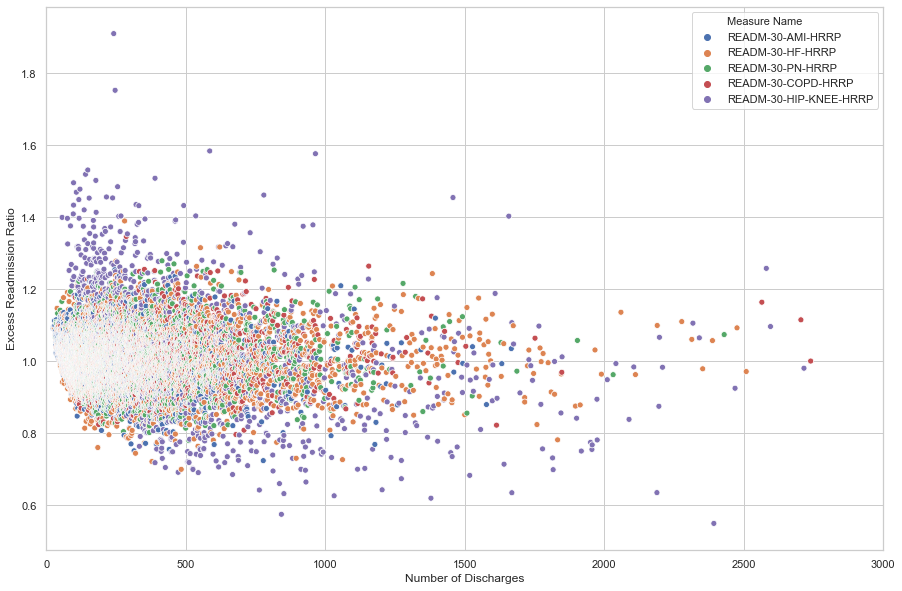

In [334]:
# Are certain procedure types causing extreme ratios?
fig,ax=plt.subplots(figsize=[15,10])
sns.scatterplot('Number of Discharges','Excess Readmission Ratio',hue='Measure Name',data=clean_hospital_read_df,ax=ax)
ax.set_xlim([0,3000])
# It looks like alot of the outliers are caused by knee and hip replacement surgeries.
# These are elective surgeries, not an emergencies like heart failure, pneumonia, heart attack.

***Review of preliminary report assertions B and C:***
* Check the summary statistics in the report
* Is there support for "significant correlation" bewteen excess readmission ratio and discharge rate?

In [123]:
clean_hospital_read_df['excess_gt_1']=clean_hospital_read_df['Excess Readmission Ratio'].apply(lambda x: 1 if x>=1 else 0)
#remove records with no discharges
clean_hospital_read_df=clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']>0]
small_hosp_df=clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']<=100]
big_hosp_df=clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges']>=1000]


In [269]:
#confirm statistics reported by authors
print('Big discharge group\nMean excess ratio: {1:0.2f}\nProportion of excess ratios greater than 1: {0:0.2f}'.format(big_hosp_df['excess_gt_1'].describe()['mean'],big_hosp_df['Excess Readmission Ratio'].describe()['mean']))
print('\nSmall discharge group\nMean excess ratio: {1:0.2f}\nProportion of excess ratios greater than 1: {0:0.2f}'.format(small_hosp_df['excess_gt_1'].describe()['mean'],small_hosp_df['Excess Readmission Ratio'].describe()['mean']))

Big discharge group
Mean excess ratio: 0.98
Proportion of excess ratios greater than 1: 0.44

Small discharge group
Mean excess ratio: 1.02
Proportion of excess ratios greater than 1: 0.63


## Response to A

* I have confirmed the results presented in the preliminary report but do not agree that they support the conclusions reached by the author.
* We observe a difference in the mean excess ratio between the two facility groups, but there is no statistical evidence to support that they are truly different results and not a chance occurrence.

---


## B.  Hypothesis testing

I will run hypothesis tests to confirm relationship between facility size and excess readmissions:

* Ho: there is no significant difference in mean excess readmission rates bewteen the small and large discharge groups
* Attempt t-test for $\alpha$ = .01
* If assumptions for t-test are violated, attempt non-parametric test

In [126]:
#Run confidence test on Ho that there is no significant difference in mean excess readmission rates bewteen the two groups

#Derive parameters for each population:
small_mean = small_hosp_df['Excess Readmission Ratio'].mean()
small_std = small_hosp_df['Excess Readmission Ratio'].std()
small_n = small_hosp_df['Excess Readmission Ratio'].size
big_mean = big_hosp_df['Excess Readmission Ratio'].mean()
big_std = big_hosp_df['Excess Readmission Ratio'].std()
big_n = big_hosp_df['Excess Readmission Ratio'].size
small_mean,small_std,small_n,big_mean,big_std,big_n

(1.0220883892068686,
 0.058154457093236786,
 1223,
 0.9783342672413797,
 0.11987768843246496,
 464)

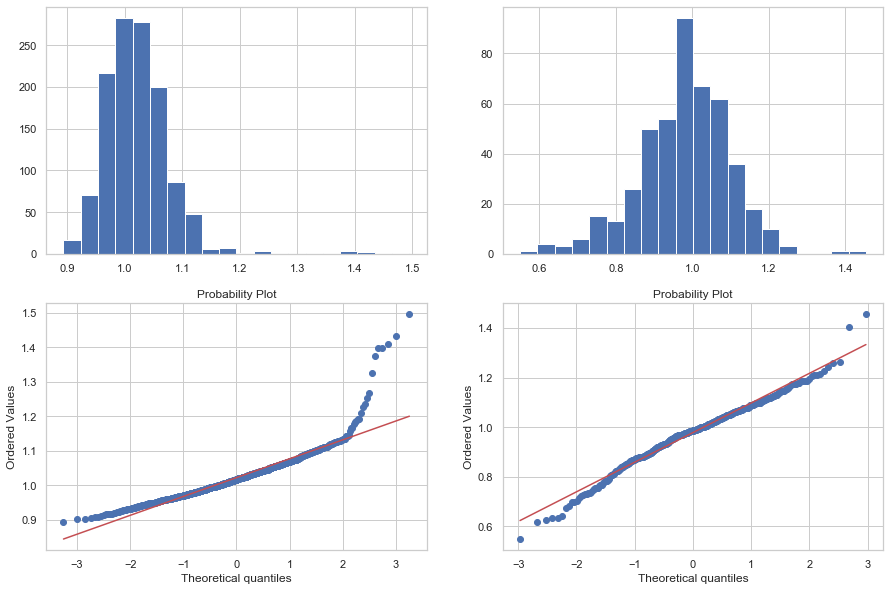

In [352]:
#Before we run a t-test need to confirm the excess readmit ratio is normally distributed
from scipy import stats
fig,axs=plt.subplots(2,2,figsize=[15,10])
axs[0,0].hist(small_hosp_df['Excess Readmission Ratio'],bins=20)
axs[0,1].hist(big_hosp_df['Excess Readmission Ratio'],bins=20)
#there are some outliers in the small hospital dataset
stats.probplot(small_hosp_df['Excess Readmission Ratio'], dist='norm',plot=axs[1,0])
stats.probplot(big_hosp_df['Excess Readmission Ratio'], dist='norm',plot=axs[1,1]);


In [279]:
#look at outliers in small hospital dataset: lots of hip and knee replacement
sorted=small_hosp_df.sort_values(by='Excess Readmission Ratio',ascending=False)
sorted.head(25)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date,excess_gt_1
8,ONSLOW MEMORIAL HOSPITAL,340042,NC,READM-30-HIP-KNEE-HRRP,98,NaN,1.4953,7.9,5.3,15.0,07/01/2010,06/30/2013,1
19,METROPLEX HOSPITAL,450152,TX,READM-30-HIP-KNEE-HRRP,98,NaN,1.4333,7.6,5.3,14.0,07/01/2010,06/30/2013,1
24,"SAINT MICHAEL'S MEDICAL CENTER, INC",310096,NJ,READM-30-HIP-KNEE-HRRP,97,NaN,1.4088,9.9,7.0,16.0,07/01/2010,06/30/2013,1
29,RALEIGH GENERAL HOSPITAL,510070,WV,READM-30-HIP-KNEE-HRRP,57,NaN,1.3992,8.5,6.1,11.0,07/01/2010,06/30/2013,1
31,SOUTHWEST MS REGIONAL MEDICAL CENTER,250097,MS,READM-30-HIP-KNEE-HRRP,76,NaN,1.3966,8.9,6.3,13.0,07/01/2010,06/30/2013,1
41,BAYSHORE COMMUNITY HOSPITAL,310112,NJ,READM-30-HIP-KNEE-HRRP,87,NaN,1.3755,10.3,7.5,15.0,07/01/2010,06/30/2013,1
67,UNIVERSITY OF MD SHORE MEDICAL CTR AT CHESTERTOWN,210030,MD,READM-30-HIP-KNEE-HRRP,77,NaN,1.3254,7.5,5.7,11.0,07/01/2010,06/30/2013,1
124,"UNIVERSITY OF CINCINNATI MEDICAL CENTER, LLC",360003,OH,READM-30-HIP-KNEE-HRRP,90,NaN,1.2686,7.3,5.8,11.0,07/01/2010,06/30/2013,1
145,DESERT SPRINGS HOSPITAL,290022,NV,READM-30-HIP-KNEE-HRRP,82,NaN,1.2519,8.2,6.6,11.0,07/01/2010,06/30/2013,1
200,SAINT JOSEPH REGIONAL MEDICAL CENTER - PLYMOUTH,150076,IN,READM-30-HIP-KNEE-HRRP,99,NaN,1.2348,7.2,5.8,11.0,07/01/2010,06/30/2013,1


It appears the small hospital dataset is not normally distributed due to the presence of many outliers in the right tail.  Will proceed with t-test regardless, and also attempt a non-parametric test, Mann-Whitney U-test for comparing independent samples.

In [356]:
#conduct t-test for means of two independent samples with different variances
stat,p=stats.ttest_ind(small_hosp_df['Excess Readmission Ratio'],big_hosp_df['Excess Readmission Ratio'],equal_var=False,nan_policy='omit')
print("t-stat: {}  p-value: {}".format(stat,p))

t-stat: 7.533013522095164  p-value: 2.0604659724727482e-13


In [358]:
# conduct nonparametric test:  mann whitney, 2-sided
stat,p=stats.mannwhitneyu(small_hosp_df['Excess Readmission Ratio'],big_hosp_df['Excess Readmission Ratio'],alternative='two-sided')
print("U-stat: {}  p-value: {}".format(stat,p))


U-stat: 349816.5  p-value: 1.4024859432648173e-13


### Result:
* Both tests result in very low p values and we conclude the average excess readmission rate is different between the two hospitals
* We see a significant differece, but how big is it actually?

**Approach:**
* Calculate the difference bewteen the expected and predicted readmission rates (as percentage of discharges)
* Calculate number of excess readmissions per 1000 discharges for each hospital group


In [372]:
# How many extra readmisisons do we predict for the average of each hospital type
# average number of actual readmissions
big_nreadmit=big_hosp_df['Number of Readmissions'].mean()
small_nreadmit=small_hosp_df['Number of Readmissions'].mean()
big_ndis=big_hosp_df['Number of Discharges'].mean()
small_ndis=small_hosp_df['Number of Discharges'].mean()

print('For the average large hospital, the predicted readmission rate is: {0:.1f}% and the expected readmission rate is {1:.1f}%'.format(big_nreadmit*100/big_ndis,big_nreadmit*big_mean*100/big_ndis))
print('This corresponds to {:.1f} excess readmissions per 1000 discharges.'.format(1000*(big_nreadmit*big_mean/big_ndis-big_nreadmit/big_ndis)))

print('For the average small hospital, the predicted readmission rate is: {0:.1f}% and the expected readmission rate is {1:.1f}%'.format(small_nreadmit*100/small_ndis,small_nreadmit*small_mean*100/small_ndis))
print('This corresponds to {:.1f} excess readmissions per 1000 discharges.'.format(1000*(small_nreadmit*small_mean/small_ndis-small_nreadmit/small_ndis)))

For the average large hospital, the predicted readmission rate is: 15.6% and the expected readmission rate is 15.3%
This corresponds to -3.4 excess readmissions per 1000 discharges.
For the average small hospital, the predicted readmission rate is: 21.2% and the expected readmission rate is 21.7%
This corresponds to 4.7 excess readmissions per 1000 discharges.


***Conclusion:  Alhough the increase in excess readmissions for small facilities is statistically significant, the overall effect size is not very large, impacting less than 1% of discharged patients.***

### B 5:  What are the advantages and disadvantages of using the original scatter plot to convey information?
* The advantage is that it shows all the data points, and specifically calls out regions of interest with the shaded boxes
* The disadvantage is that the points get muddled for discharges<1000, and it doesnt clearly support the assertion that there is a declining trend.

#### Below are additional ways of visualizing the distribution of readmission rate by facility size.


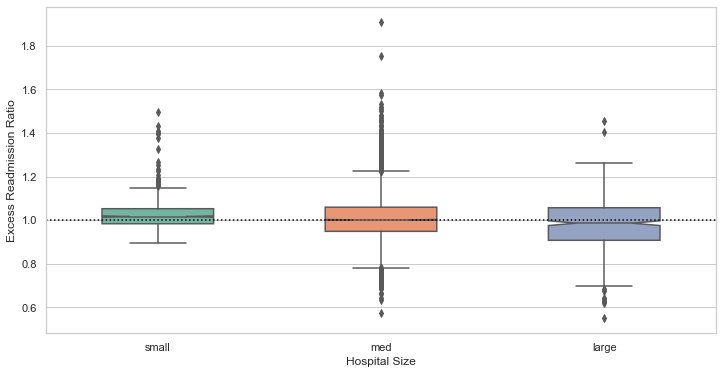

In [373]:
# Distribution plot:  boxplots of excess readmission rate by hospital size
# We see that the median excess readmission ratios are all close to 1.0.  
# Medium and large sized hospitals have outliers on both sides of the distribution 
# Small facilities have a tighter distribution and no low outliers
fig,ax=plt.subplots(figsize=[12,6])
clean_hospital_read_df['Hospital Size']=pd.cut(clean_hospital_read_df['Number of Discharges'],[0,100,1000,10000],labels=['small','med','large'])
ax.axhline(1,color='black',linestyle=':')

sns.boxplot(x='Hospital Size',y='Excess Readmission Ratio',data=clean_hospital_read_df,ax=ax,palette='Set2',width=0.5,notch=True)

Text(0, 0.5, 'Probability Density')

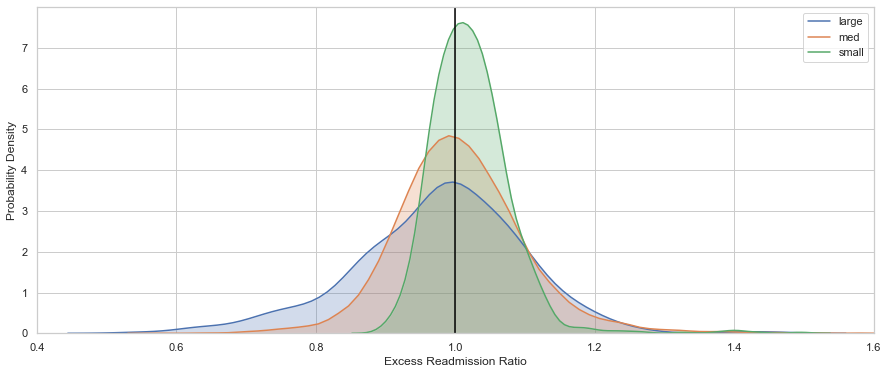

In [339]:
#Same data presented as kernel density plot
fig,ax=plt.subplots(figsize=[15,6])
for r in ['large','med','small']:
    sns.kdeplot(clean_hospital_read_df.loc[clean_hospital_read_df['Hospital Size']==r,'Excess Readmission Ratio'],shade=True,label=r)
ax.set_xlim([0.4,1.6])
ax.set_xlabel('Excess Readmission Ratio')
ax.axvline(1,color='black')
ax.set_ylabel('Probability Density')

The overall distribution plots fail to show how the excess readmission ratio varies by procedure.  Below I've broken out the box plot by measure name.

(0.5, 1.6)

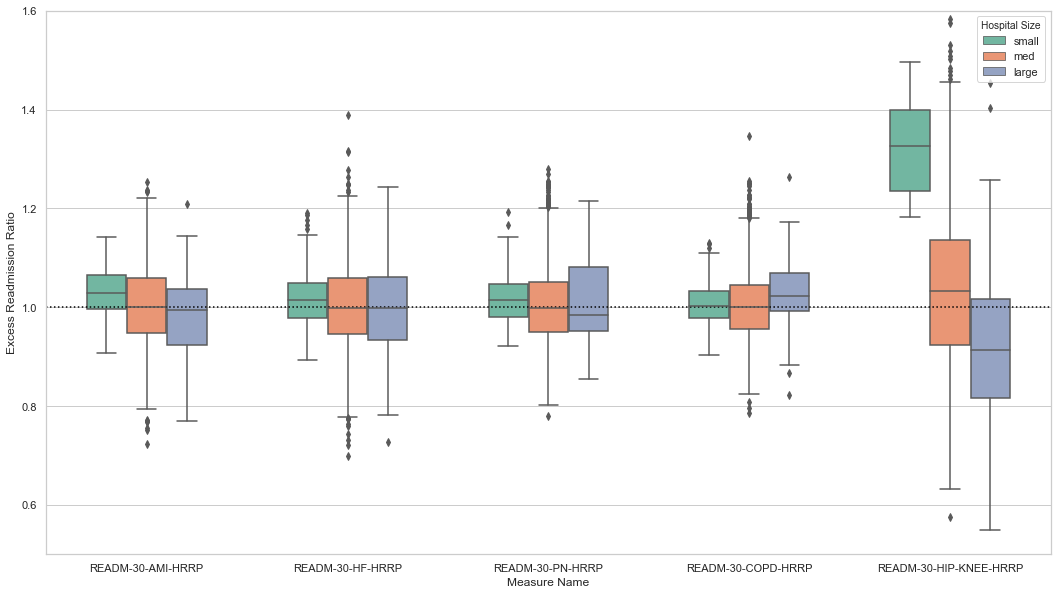

In [387]:
#Regenerate the boxplots by measure for different hospital sizes.

fig,ax=plt.subplots(figsize=[18,10])
clean_hospital_read_df['Hospital Size']=pd.cut(clean_hospital_read_df['Number of Discharges'],[0,100,1000,10000],labels=['small','med','large'])
ax.axhline(1,color='black',linestyle=':')

sns.boxplot(x='Measure Name',y='Excess Readmission Ratio',hue='Hospital Size',data=clean_hospital_read_df,ax=ax,palette='Set2',width=0.6)
ax.set_ylim(0.5,1.6)

#We see that the distributions of excess ratio are fairly clustered for the non-elective procedures.
#For the knee and hip surgeries the outcomes are much more variable.

Does this insight change our conclusions?  

In [385]:
# Re-run significance tests by procedure
for typ in clean_hospital_read_df['Measure Name'].unique():
    smxr=small_hosp_df.loc[small_hosp_df['Measure Name']==typ,'Excess Readmission Ratio']
    bgxr=big_hosp_df.loc[big_hosp_df['Measure Name']==typ,'Excess Readmission Ratio']
    #s,p=stats.ttest_ind(smxr,bgxr,equal_var=False,nan_policy='omit')
    s,p=stats.mannwhitneyu(smxr,bgxr,alternative='two-sided')
    print(typ,p)

READM-30-AMI-HRRP 0.010213872391018187
READM-30-HF-HRRP 0.006489955804708564
READM-30-PN-HRRP 0.8919813338287531
READM-30-COPD-HRRP 0.0415179894664749
READM-30-HIP-KNEE-HRRP 1.641171448914084e-10


**Results**: When we look at the data by hospital size and measure name, we still find significant differences (for alpha = 1%) in excess readmission ratio between large and small hospitals (with the exception of pneumonia). The plot suggests the effects are likely to be small with the exception of hip and knee surgeries, where there is a more substantial difference between hospital sizes. Regulatory approaches to improve hospital outcomes may choose to focus on these procedures at small facilities.

In [ ]:
#Other approaches, not being submitted

In [301]:
#bootstrap correlation testreps=np.empty(1000)
for n in range(1000):
    y_perm = np.random.permutation(y)
    reps[n]=np.corrcoef(x,y_perm)[0,1]
cor=np.corrcoef(x,y)[0,1]

In [382]:
sum(np.abs(reps)>np.abs(cor))

0

In [380]:
#bootstrap test for difference in means
#shift big and small datasets to the combined mean
#resample and compute difference in means

obsdiff=big_mean-small_mean

all_mean=clean_hospital_read_df.loc[clean_hospital_read_df['Hospital Size'].isin(['small','big']),'Excess Readmission Ratio'].mean()
                           
sm_excs=small_hosp_df['Excess Readmission Ratio'].values - small_hosp_df['Excess Readmission Ratio'].mean() + all_mean
bg_excs=big_hosp_df['Excess Readmission Ratio'].values - big_hosp_df['Excess Readmission Ratio'].mean() + all_mean

mndifs=np.empty(10000)
for n in range(10000): 
    smreps=np.random.choice(sm_excs,size=len(sm_excs))
    bgreps=np.random.choice(bg_excs,size=len(bg_excs))
    meandiff=np.mean(bgreps)-np.mean(smreps)
    mndifs[n]=meandiff

obsdiff

-0.04375412196548889

In [379]:
sum(np.abs(mndifs)>np.abs(obsdiff))


0

In [ ]:
#Observation A:  do we actually see evidence of declining readmission rate (actual, not excess) with increase in number of discharges?
fig,ax = plt.subplots(figsize=[15,8])
y_act = clean_hospital_read_df.apply(lambda row:row['Number of Readmissions']/row['Number of Discharges'],axis=1)
y_act=y_act[81:-3]

sns.regplot(x,y_act,ax=ax,scatter_kws={'alpha':0.2})
ax.set_xlabel('Discharges')
ax.set_ylabel('Observed Readmit Rate')
#This distribution is really weird, not sure what's going on here.